In [207]:
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import tweepy
import time
from datetime import datetime
import random as rd
import json
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [139]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [140]:
#  Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations:
#  @BBCBreaking, @CBSNews, @CNNbrk, @FoxNews, and @nytimes.

In [141]:
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

In [142]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [209]:
target_term = "@CNNbrk"
news_agency_list = ["@BBCBreaking", "@CBSNews", "@CNNbrk", "@FoxNews", "@nytimes"]

In [339]:
tweetID_list = []
datetime_list = []
timestamp_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

In [223]:
public_tweets = api.user_timeline(target_term)

In [258]:
avg_sentiment_list = []

In [330]:
columns = ["compound","positive","negative","neutral"]
news_df = pd.DataFrame(columns=columns)
tweetID_list = []
datetime_list = []
timestamp_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
counter = 1

for x in range(1,6):
    public_tweets = api.user_timeline(target_term, page=x)
    
    for tweet in public_tweets:
        tid = counter
        tim = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")
        com = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]

        tweetID_list.append(tid)
        datetime_list.append(tim.strftime("%Y-%m-%d %H:%M:%S"))
        timestamp_list.append(tim.timestamp())
        compound_list.append(com)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
    
        counter += 1
    
    sentiment = {
        "Tweet_counter": tweetID_list,
        "datetime": datetime_list,
        "timestamp": timestamp_list,
        "Compound": compound_list,
        "Positive":positive_list,
        "Neutral": negative_list,
        "Negative": neutral_list
    }
    
news_df = pd.DataFrame.from_dict(sentiment)
avg_sentiment = news_df['Compound'].mean()
avg_sentiment_list.append(avg_sentiment)

In [331]:
print(news_df.count())
news_df.head()

Compound         100
Negative         100
Neutral          100
Positive         100
Tweet_counter    100
datetime         100
timestamp        100
dtype: int64


,Compound,Negative,Neutral,Positive,Tweet_counter,datetime,timestamp
0,0.0772,0.769,0.109,0.122,1,2018-04-10 23:03:44,1.523401e+09
1,0.1280,0.765,0.104,0.131,2,2018-04-10 20:05:30,1.523391e+09
2,0.4019,0.847,0.000,0.153,3,2018-04-10 20:00:59,1.523390e+09
3,0.4019,0.739,0.097,0.163,4,2018-04-10 19:36:14,1.523389e+09
4,0.0772,0.766,0.092,0.142,5,2018-04-10 19:13:24,1.523388e+09


In [336]:
# avg_sentiment_dict = {}
# avg_sentiment_dict["News Agency"] = news_agency_names
# avg_sentiment_dict["Avg. Sentiment"] = avg_sentiment_list
# # pd.DataFrame.from_dict(avg_sentiment_dict)
# avg_sentiment_pd = pd.DataFrame.from_dict(avg_sentiment_dict)
# avg_sentiment_pd

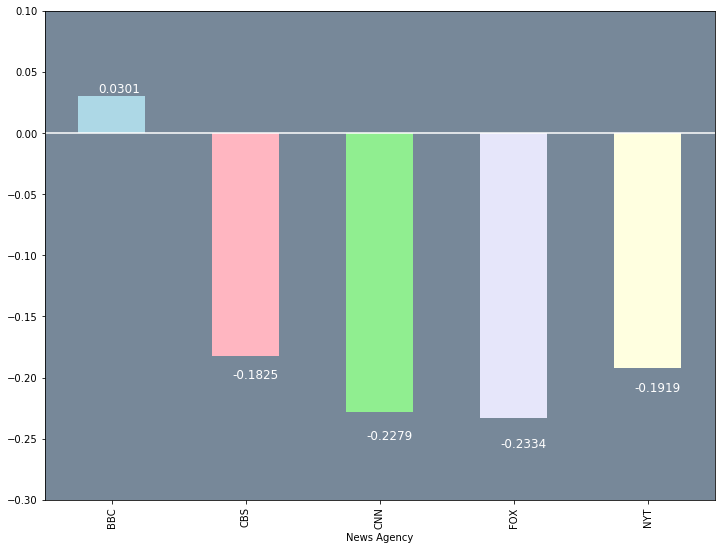

In [329]:
colors = ["lightblue","lightpink","lightgreen","lavender","lightyellow"]
sent_plot = avg_sentiment_pd.plot(kind='bar', x='News Agency', y='Avg. Sentiment', color=colors, alpha=1.0, figsize=(12,9), legend=False)
x_axis = np.arange(0,5,1)
y_data = avg_sentiment_pd["Avg. Sentiment"]
for j in x_axis:
        sent_plot.text(j-0.1, y_data[j]*1.1, '{:.4f}'.format(y_data[j]),fontsize=12, color='white')
sent_plot.set_xlim((-0.5, 4.5))
sent_plot.set_ylim((-0.30, 0.10))
sent_plot.set_facecolor("lightslategray")
plt.axhline(color = 'white')
# plt.legend(fontsize=14, facecolor="lightslategray")
plt.show()

In [333]:
#  news_agency_list = ["@BBCBreaking", "@CBSNews", "@CNNbrk", "@FoxNews", "@nytimes"]

news_agency_names = ["BBC","CBS","CNN","FOX","NYT"]

colors = { 
    "@BBCBreaking" : "lightblue",
    "@CBSNews" : "yellow",
    "@CNNbrk" : "white",
    "@FoxNews" : "lightpink",
    "@nytimes" : "lightgreen"
}

twitter_tag = {
    "BBC" : "@BBCBreaking",
    "CBS" : "@CBSNews",
    "CNN" : "@CNNbrk",
    "FOX" : "@FoxNews",
    "NYT" : "@nytimes"
}

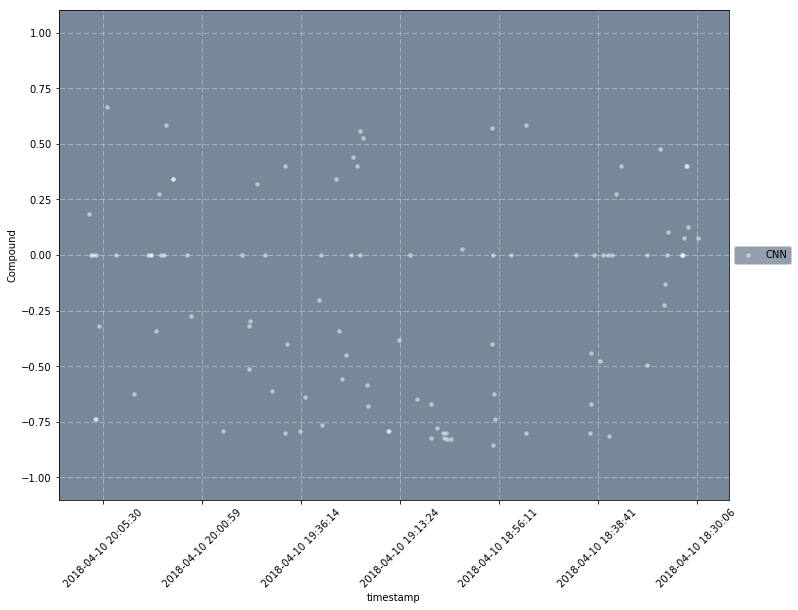

In [334]:

news_plot = news_df.plot(kind='scatter', x='timestamp', y='Compound', color=colors["@CNNbrk"], alpha=0.5, linewidth=0, figsize=(12,9))
news_plot.set_ylim((-1.10, 1.10))
news_plot.set_facecolor("lightslategray")
news_plot.grid(color="white", linestyle="dashed", alpha=0.4)
news_plot.set_xticklabels(news_df['datetime'], rotation=45)
plt.legend([news_agency_names[2]], loc='center left', bbox_to_anchor=(1.0, 0.5), facecolor="lightslategray")

plt.show()


In [341]:
def sentiment_pd (target):
    
    columns = ["compound","positive","negative","neutral"]
    news_df = pd.DataFrame(columns=columns)
    tweetID_list = []
    datetime_list = []
    timestamp_list = []
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    counter = 1
    
    for x in range(1,6):
        tweets = api.user_timeline(target, page=x)
        
        for tweet in tweets:
            tid = counter
            tim = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")
            com = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]

            tweetID_list.append(tid)
            datetime_list.append(tim.strftime("%Y-%m-%d %H:%M:%S"))
            timestamp_list.append(tim.timestamp())
            compound_list.append(com)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
    
            counter += 1
    
    sentiment = {
        "Tweet_counter": tweetID_list,
        "datetime": datetime_list,
        "timestamp": timestamp_list,
        "Compound": compound_list,
        "Positive":positive_list,
        "Neutral": negative_list,
        "Negative": neutral_list
    }
    
    news_df = pd.DataFrame.from_dict(sentiment)
    return news_df

In [342]:
df = sentiment_pd("@BBCBreaking")
print(df.count())
df.head()

Compound         100
Negative         100
Neutral          100
Positive         100
Tweet_counter    100
datetime         100
timestamp        100
dtype: int64


,Compound,Negative,Neutral,Positive,Tweet_counter,datetime,timestamp
0,0.5707,0.862,0.000,0.138,1,2018-04-10 20:39:39,1.523393e+09
1,0.5707,0.822,0.000,0.178,2,2018-04-10 20:33:30,1.523392e+09
2,-0.7184,0.727,0.273,0.000,3,2018-04-10 15:18:40,1.523374e+09
3,0.5267,0.784,0.000,0.216,4,2018-04-10 08:44:37,1.523350e+09
4,-0.4939,0.833,0.167,0.000,5,2018-04-10 06:59:57,1.523344e+09


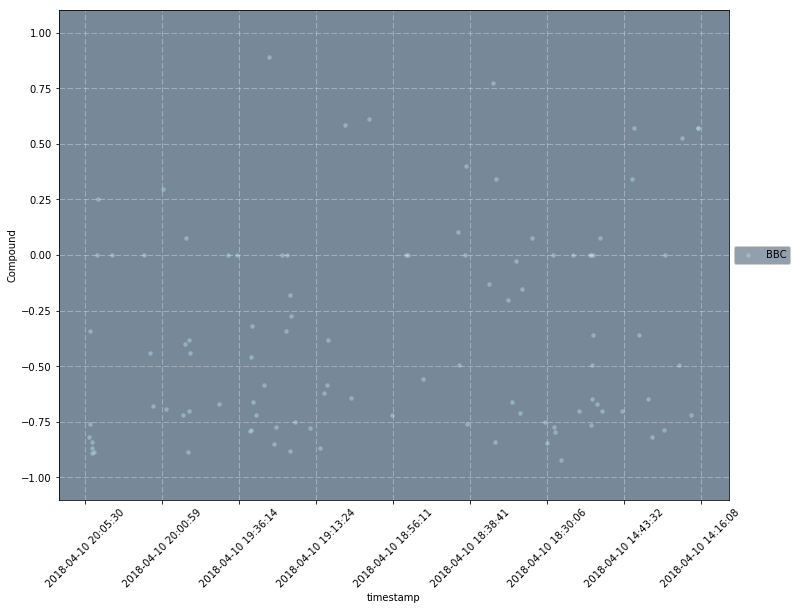

In [345]:
ax = df.plot(kind='scatter', x='timestamp', y='Compound', color=colors["@BBCBreaking"], alpha=0.5, linewidth=0, figsize=(12,9))
ax.set_ylim((-1.10, 1.10))
ax.set_facecolor("lightslategray")

ax.grid(color="white", linestyle="dashed", alpha=0.4)
ax.set_xticklabels(news_df['datetime'], rotation=45)
plt.legend([news_agency_names[0]], loc='center left', bbox_to_anchor=(1.0, 0.5), facecolor="lightslategray")

plt.show()

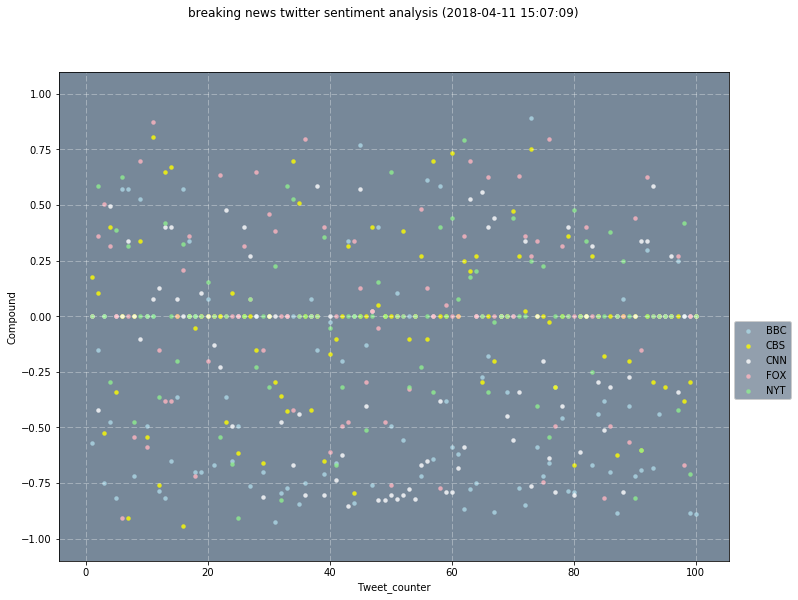

In [368]:

sent_list=[]
news_agency_list = ["@BBCBreaking", "@CBSNews", "@CNNbrk", "@FoxNews", "@nytimes"]
news_agency_names = ["BBC","CBS","CNN","FOX","NYT"]

colors = { 
    "@BBCBreaking" : "lightblue",
    "@CBSNews" : "yellow",
    "@CNNbrk" : "white",
    "@FoxNews" : "lightpink",
    "@nytimes" : "lightgreen"
         }

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim((-1.10, 1.10))
ax.set_facecolor("lightslategray")

for target_term in news_agency_list:
    df = sentiment_pd(target_term)
    avg = df['Compound'].mean()
    sent_list.append(avg)
    df.plot(kind='scatter', x='Tweet_counter', y='Compound', color=colors[target_term], ax=ax, alpha=0.8, linewidth=0, figsize=(12,9))

ax.grid(color="white", linestyle="dashed", alpha=0.4)
plt.legend(news_agency_names, loc='upper left', bbox_to_anchor=(1.0, 0.5), facecolor='lightslategray')
current_time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
plt.suptitle("breaking news twitter sentiment analysis ({})".format(current_time))
plt.savefig("news_sentiment.png")
plt.show()

In [352]:
sent_dict = {}
sent_dict["News Agency"] = news_agency_names
sent_dict["Avg. Sentiment"] = sent_list
# pd.DataFrame.from_dict(avg_sentiment_dict)
sent_pd = pd.DataFrame.from_dict(sent_dict)
sent_pd

,Avg. Sentiment,News Agency
0,-0.347754,BBC
1,0.010828,CBS
2,-0.192930,CNN
3,0.044936,FOX
4,-0.034215,NYT


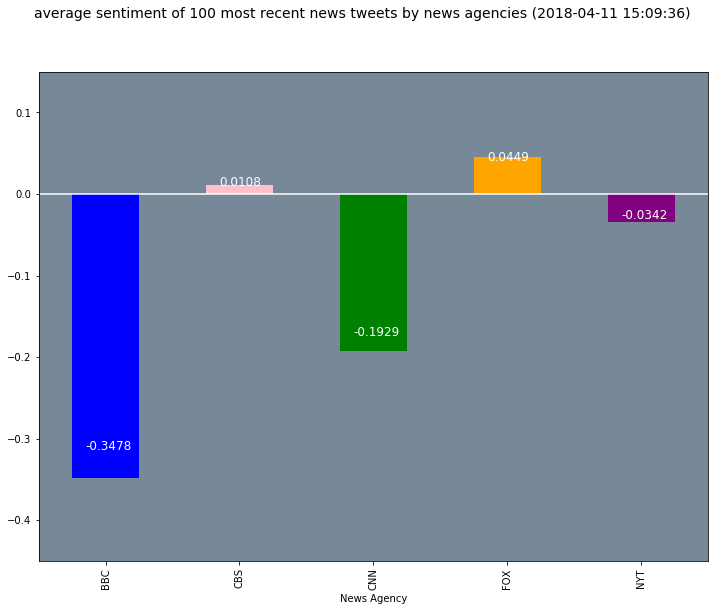

In [371]:
colors = ["blue","pink","green","orange","purple"]
sent_plot = sent_pd.plot(kind='bar', x='News Agency', y='Avg. Sentiment', color=colors, alpha=1.0, figsize=(12,9), legend=False)
x_axis = np.arange(0,5,1)
y_data = sent_pd["Avg. Sentiment"]
for j in x_axis:
        sent_plot.text(j-0.15, y_data[j]*0.9, '{:.4f}'.format(y_data[j]),fontsize=12, color='white')
sent_plot.set_xlim((-0.5, 4.5))
sent_plot.set_ylim((-0.45, 0.15))
sent_plot.set_facecolor("lightslategray")
plt.axhline(color = 'white')
current_time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
plt.suptitle("average sentiment of 100 most recent news tweets by news agencies ({})".format(current_time), fontsize=14)
# plt.legend(fontsize=14, facecolor="lightslategray")
plt.savefig("avg_sentiment.png")
plt.show()